## __Task 1: Exploratory Data Analytics__

### (a) Report of the number of articles, and the number of extracted features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics

df = pd.read_csv("train.csv",delimiter = ",")
X = df.drop('Category', axis=1)
y = df['Category']

# Extract the Text column
texts = df['Text']
print(X.head())
texts.head()

   ArticleId                                               Text
0       1976  lifestyle governs mobile choice faster better ...
1       1797  french honour director parker british film dir...
2       1866  fockers fuel festive film chart comedy meet fo...
3       1153  housewives lift channel 4 ratings debut us tel...
4        342  u2 desire number one u2 three prestigious gram...


0    lifestyle governs mobile choice faster better ...
1    french honour director parker british film dir...
2    fockers fuel festive film chart comedy meet fo...
3    housewives lift channel 4 ratings debut us tel...
4    u2 desire number one u2 three prestigious gram...
Name: Text, dtype: object

In [ ]:
# Using CountVectorizer to identify unique words and transform the text data
count_vectorizer = CountVectorizer() #CountVectorizer is a class, CountVectorizer() is an object
count_X = count_vectorizer.fit_transform(texts)
#output of count_X: (0, 7222) 2 - (row index, column index)  the count of the term
#return a sparse matrix

# Convert the feature vectors to a DataFrame
count_feature_df = pd.DataFrame(count_X.toarray(), columns=count_vectorizer.get_feature_names_out())

count_feature_df.head()

,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Add the ArticleId and Category columns to the feature dataframe
count_feature_df.insert(0, 'ArticleId', df['ArticleId'])
count_feature_df.insert(1, 'Text', df['Text'])
count_feature_df['Category'] = df['Category']

# Show the number of articles and the number of extracted features
num_articles = len(df)
num_count_features = count_X.shape[1]
print(f'Number of articles: {num_articles}')
print(f'Number of extracted features (CountVectorizer): {num_count_features}')
print()
# Show 5 example articles with their extracted features
print("Example articles with extracted features (CountVectorizer):")
print(count_feature_df.head(5))

Number of articles: 428
Number of extracted features (CountVectorizer): 13518

Example articles with extracted features (CountVectorizer):
   ArticleId                                               Text  00  000  \
0       1976  lifestyle governs mobile choice faster better ...   0    1   
1       1797  french honour director parker british film dir...   0    0   
2       1866  fockers fuel festive film chart comedy meet fo...   0    0   
3       1153  housewives lift channel 4 ratings debut us tel...   0    0   
4        342  u2 desire number one u2 three prestigious gram...   0    0   

   000th  001st  0051  007  0100  0130  ...  zombie  zombies  zone  zonealarm  \
0      0      0     0    0     0     0  ...       0        0     0          0   
1      0      0     0    0     0     0  ...       0        0     0          0   
2      0      0     0    0     0     0  ...       0        0     0          0   
3      0      0     0    0     0     0  ...       0        0     0          0   

### (b) Term frequency analysis and three plots:

### (i) Top-50 term frequency distribution across the entire dataset

In [ ]:
#sum the count of each term: 2-dimensional array of the count of all terms
print(count_X.sum(axis=0).shape)
#print(count_X.sum(axis=0).tolist())

# Sum the term frequencies for the entire dataset using CountVectorizer
term_frequencies = count_X.sum(axis=0).tolist()[0]
#flattens the 2-dimensional array into a 1-dimensional array

(1, 13518)


Top-50 Term Frequency Distribution Across the Entire Dataset:
             term  frequency
10567        said       1357
8917       people        612
8257          new        500
859          also        479
8516          one        479
4899         film        462
13459        year        442
8108        music        413
12829          us        411
8069           mr        408
13402       would        374
1610         best        361
3158        could        322
4962        first        306
12634          uk        297
7939       mobile        291
11013        show        271
12285        time        271
7552         many        259
8399       number        257
7494         make        253
12090  technology        250
12603          tv        246
12835         use        241
7236         like        239
7856      million        229
13386       world        222
3748      digital        221
7060         last        220
12616         two        217
8234          net        216
5317      

<Figure size 2000x1000 with 0 Axes>

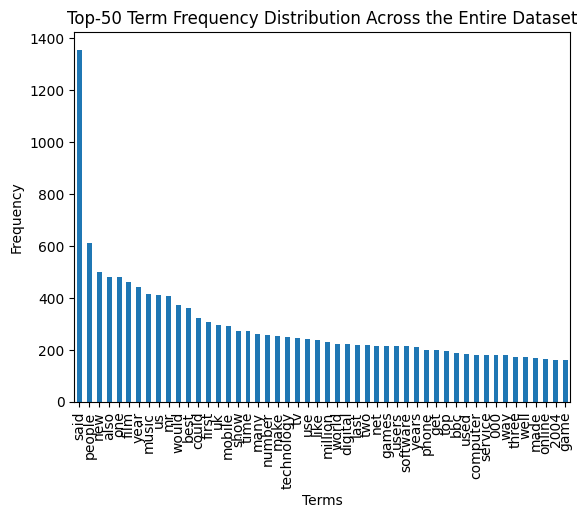

In [ ]:
terms = count_vectorizer.get_feature_names_out() #name of terms
term_freq_df = pd.DataFrame({'term': terms, 'frequency': term_frequencies})
term_freq_df = term_freq_df.sort_values(by='frequency', ascending=False)

# Print and plot top-50 term frequency distribution across the entire dataset
print("Top-50 Term Frequency Distribution Across the Entire Dataset:")
print(term_freq_df.head(50))

plt.figure(figsize=(20, 10)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
term_freq_df.head(50).plot(kind='bar', x='term', y='frequency', legend=False)
plt.title('Top-50 Term Frequency Distribution Across the Entire Dataset')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()


### (ii) Term frequency distribution for respective class of articles

<Figure size 2000x1000 with 0 Axes>

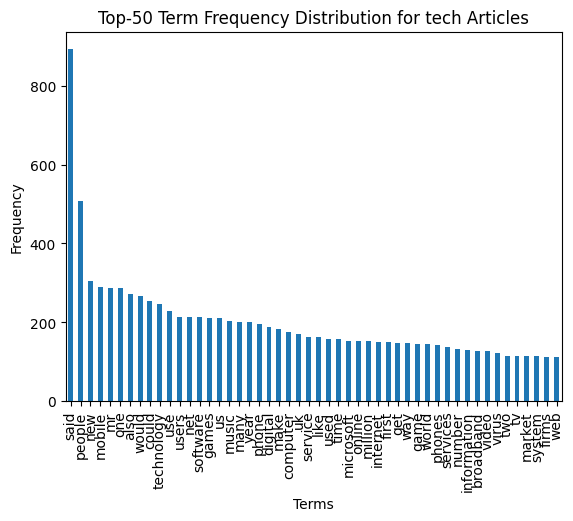

<Figure size 2000x1000 with 0 Axes>

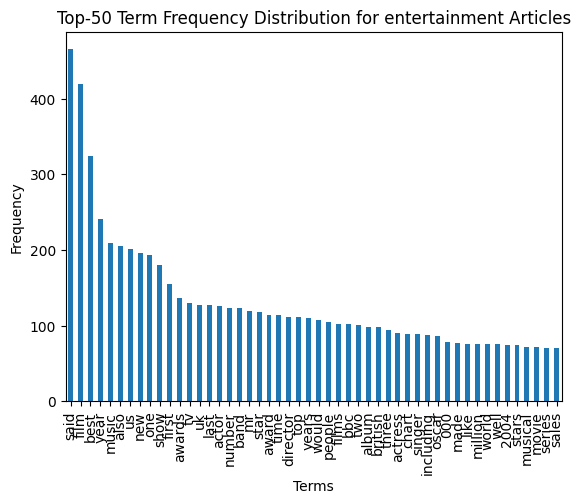

In [ ]:
# (ii) Term Frequency Distribution for Respective Class of Articles
categories = df['Category'].unique()

for category in categories:
    # Filter articles of the current category
    class_df = df[df['Category'] == category]

    # Fit and transform the text data for the current category
    class_count_X = count_vectorizer.fit_transform(class_df['Text'])

    # Sum the term frequencies for the current category
    class_term_frequencies = class_count_X.sum(axis=0).tolist()[0]
    class_terms = count_vectorizer.get_feature_names_out()
    class_term_freq_df = pd.DataFrame({'term': class_terms, 'frequency': class_term_frequencies})
    class_term_freq_df = class_term_freq_df.sort_values(by='frequency', ascending=False)

    # Plot term frequency distribution for the current category
    plt.figure(figsize=(20, 10))
    class_term_freq_df.head(50).plot(kind='bar', x='term', y='frequency', legend=False)
    plt.title(f'Top-50 Term Frequency Distribution for {category} Articles')
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()


### (iii) Class distribution

In [ ]:
#Show Category distribution

#If normalize=False then return the count of the unique values.
class_distribution_count = df['Category'].value_counts(normalize=False)
#If normalize=True then return the relative frequencies of the unique values.
class_distribution_freq = df['Category'].value_counts(normalize=True) * 100

print("Class Distribution (count):")
print(class_distribution_count)
print("\nClass Distribution (in %):")
print(class_distribution_freq)

Class Distribution (count):
Category
tech             216
entertainment    212
Name: count, dtype: int64

Class Distribution (in %):
Category
tech             50.46729
entertainment    49.53271
Name: proportion, dtype: float64


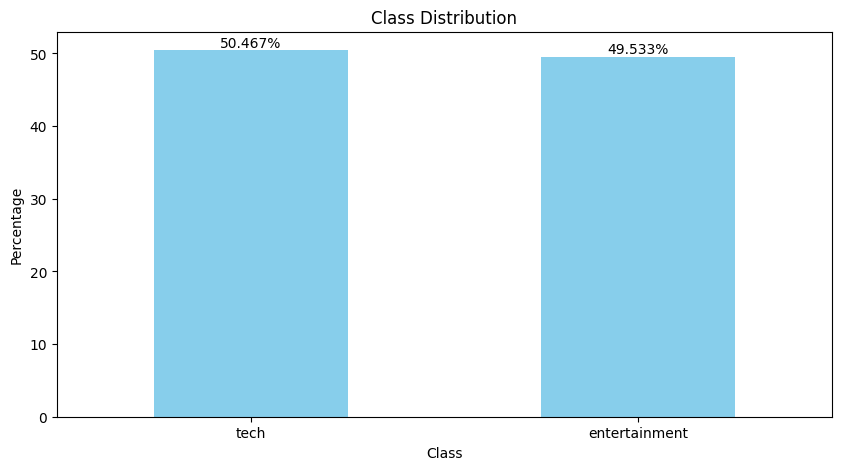

In [ ]:
# Plot Category distribution

plt.figure(figsize=(10, 5))
cdf = class_distribution_freq.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# Add value labels on top of the bars
cdf.bar_label(cdf.containers[0], fmt='%.3f%%')

plt.show()

## __Task 2: Classification Models Learning__

### (a) NB. Train a Naive Bayes classifier using all articles features.

### (i) Top-20 most identifiable words over two classes using your NB classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Prepare the data
texts = df['Text']
y = df['Category']

# Vectorize the text data
count_vectorizer = CountVectorizer()
count_X = count_vectorizer.fit_transform(texts)

# Initialize and train the classifier
clf = MultinomialNB()
clf.fit(count_X, y)

# Vocabulary and log probabilities
vocab = count_vectorizer.get_feature_names_out()
prob = np.exp(clf.feature_log_prob_)  # Convert log probabilities to actual probabilities

# Dictionary for conditional probabilities of each word in each class
class_probabilities = {}

for i, class_name in enumerate(clf.classes_):
    class_probabilities[class_name] = {}
    for j in range(len(vocab)):
        class_probabilities[class_name][vocab[j]] = prob[i, j]

# Sort and select top-20 words for each class
top_words = {}
for class_name in clf.classes_:
    sorted_words = sorted(class_probabilities[class_name].items(), key=lambda item: item[1], reverse=True)
    top_words[class_name] = dict(sorted_words[:20])

# Display top-20 words for each class and check for 'said'
for class_name in top_words:
    print(f"Top 20 most identifiable words for {class_name} class:")
    for word, ratio in top_words[class_name].items():
        print(f"{word}: {ratio:.4f}")
    print()

Top 20 most identifiable words for entertainment class:
said: 0.0084
film: 0.0076
best: 0.0059
year: 0.0044
music: 0.0038
also: 0.0037
us: 0.0036
new: 0.0036
one: 0.0035
show: 0.0033
first: 0.0028
awards: 0.0025
tv: 0.0024
last: 0.0023
uk: 0.0023
actor: 0.0023
number: 0.0023
band: 0.0022
mr: 0.0022
star: 0.0021

Top 20 most identifiable words for tech class:
said: 0.0118
people: 0.0067
new: 0.0040
mobile: 0.0038
mr: 0.0038
one: 0.0038
also: 0.0036
would: 0.0035
could: 0.0034
technology: 0.0033
use: 0.0030
net: 0.0028
users: 0.0028
software: 0.0028
games: 0.0028
us: 0.0028
music: 0.0027
many: 0.0027
year: 0.0027
phone: 0.0026



### (ii) Top-20 words that maximize the ratio using 𝑷(𝑿𝒘 = 𝟏|𝒀 = 𝒚) / 𝑷(𝑿𝒘 = 𝟏|𝒀 ≠ 𝒚)

In [ ]:
# Calculate the ratios
word_ratios = {}
for word in vocab:
    for class_name in clf.classes_:
        # Probability of word in current class
        prob_in_class = class_probabilities[class_name][word]
        #Probability of word not in current class
        for other_class in clf.classes_:
            if other_class != class_name:
                prob_not_in_class = class_probabilities[other_class][word]

        if prob_not_in_class > 0:
            ratio = prob_in_class / prob_not_in_class
        else:
            ratio = 0  # Handle division by zero if the word does not appear in other classes at all
        if class_name not in word_ratios:
            word_ratios[class_name] = {}
        word_ratios[class_name][word] = ratio

# Sort the ratios and select the top 20 for each class
top_20_words_by_ratio = {}
for class_name, ratios in word_ratios.items():
    sorted_ratios = sorted(ratios.items(), key=lambda x: x[1], reverse=True)
    top_20_words_by_ratio[class_name] = dict(sorted_ratios[:20])

# Output the results
print("Top 20 words that maximize the ratio for each class:")
for class_name, words in top_20_words_by_ratio.items():
    print(f"Class '{class_name}':")
    for word, ratio in words.items():
        print(f"{word}: {ratio:.4f}")
    print("\n")


Top 20 words that maximize the ratio for each class:
Class 'entertainment':
actress: 124.3494
singer: 122.9829
oscar: 120.2500
stars: 103.8523
aviator: 86.0881
band: 84.7216
nominated: 75.1562
festival: 72.4233
rock: 72.4233
album: 67.6406
nominations: 65.5909
charles: 64.2244
chart: 61.4915
foxx: 60.1250
oscars: 58.7585
starring: 57.3920
singles: 51.9261
jamie: 47.8267
swank: 45.0937
comedy: 44.4105


Class 'tech':
users: 157.3389
software: 156.6071
microsoft: 113.4304
mobile: 106.4782
broadband: 94.4033
virus: 90.0125
firms: 83.4262
pc: 79.7672
spam: 62.2037
phones: 53.0561
gadget: 52.6902
net: 52.4463
consumer: 50.4948
mobiles: 49.7630
gadgets: 49.0312
machines: 49.0312
windows: 49.0312
technologies: 47.5676
systems: 46.8358
device: 46.1040




The second list describe the two classes better, here are the reasons:

1. The first list is derived by ranking words based on the conditional probability given the class. It mainly shows which words are most common within the articles of each class, based on their frequency of occurrence in the text.
2. The second list is calculated based on maximising the ratio, which identifies the words that are not only common in one class but also not common in the other class. Making them highly distinctive for the class.

Therefore, the second list focusing on words that maximise the ratio of in-class to out-of-class probability is generally more beneficial.


### (b) kNN. Train a kNN classifier on the training dataset.

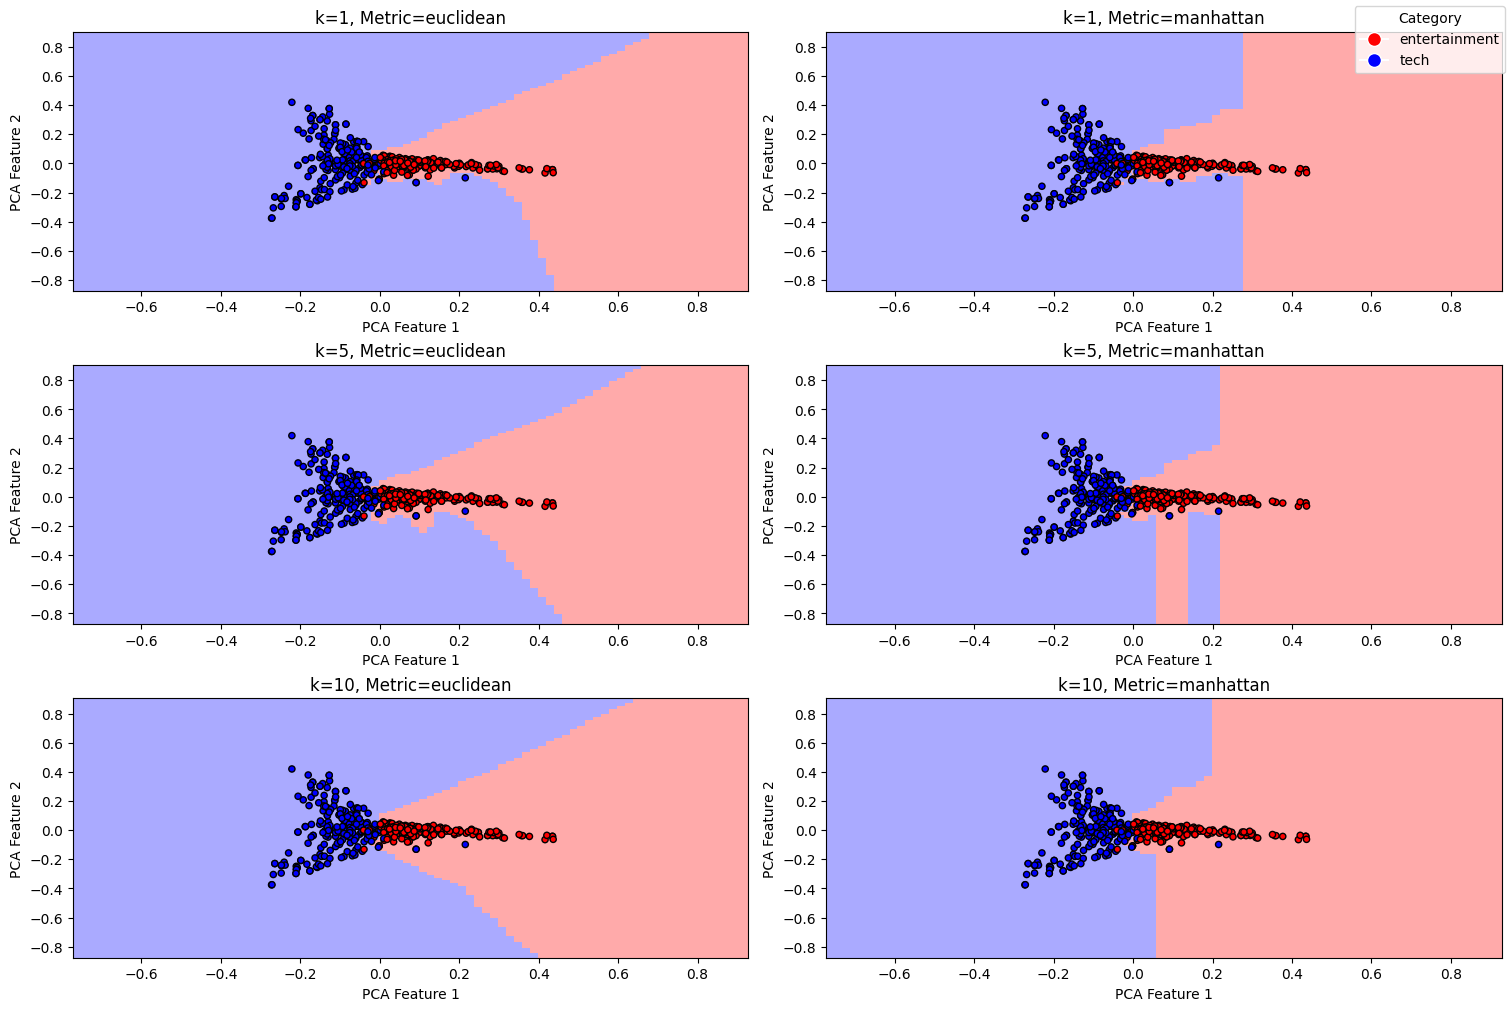

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and is already loaded with your data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Text'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Define color maps for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])  # Only red and blue colors

def plot_decision_boundaries_for_k_values(k_values, distance_metrics):
    fig, axes = plt.subplots(nrows=len(k_values), ncols=len(distance_metrics), figsize=(15, 10), constrained_layout=True)
    padding = 0.5  # Smaller padding for tighter zoom

    for i, k in enumerate(k_values):
        for j, metric in enumerate(distance_metrics):
            # Define mesh grid parameters for a zoomed in view before prediction
            x_min, x_max = X_reduced[:, 0].min() - padding, X_reduced[:, 0].max() + padding
            y_min, y_max = X_reduced[:, 1].min() - padding, X_reduced[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                                 np.arange(y_min, y_max, 0.02))

            # Train kNN with specified distance metric and k value
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            knn.fit(X_reduced, y)
            Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plotting
            ax = axes[i, j]
            ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
            scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_title(f"k={k}, Metric={metric}")
            ax.set_xlabel('PCA Feature 1')
            ax.set_ylabel('PCA Feature 2')

    # Create a legend for the plot
    classes = label_encoder.classes_
    class_colors = [cmap_bold.colors[i] for i in range(len(classes))]
    patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in class_colors]
    fig.legend(patches, classes, loc='upper right', title='Category')

k_values = [1, 5, 10]
distance_metrics = ['euclidean', 'manhattan']
plot_decision_boundaries_for_k_values(k_values, distance_metrics)


### (c) SVM

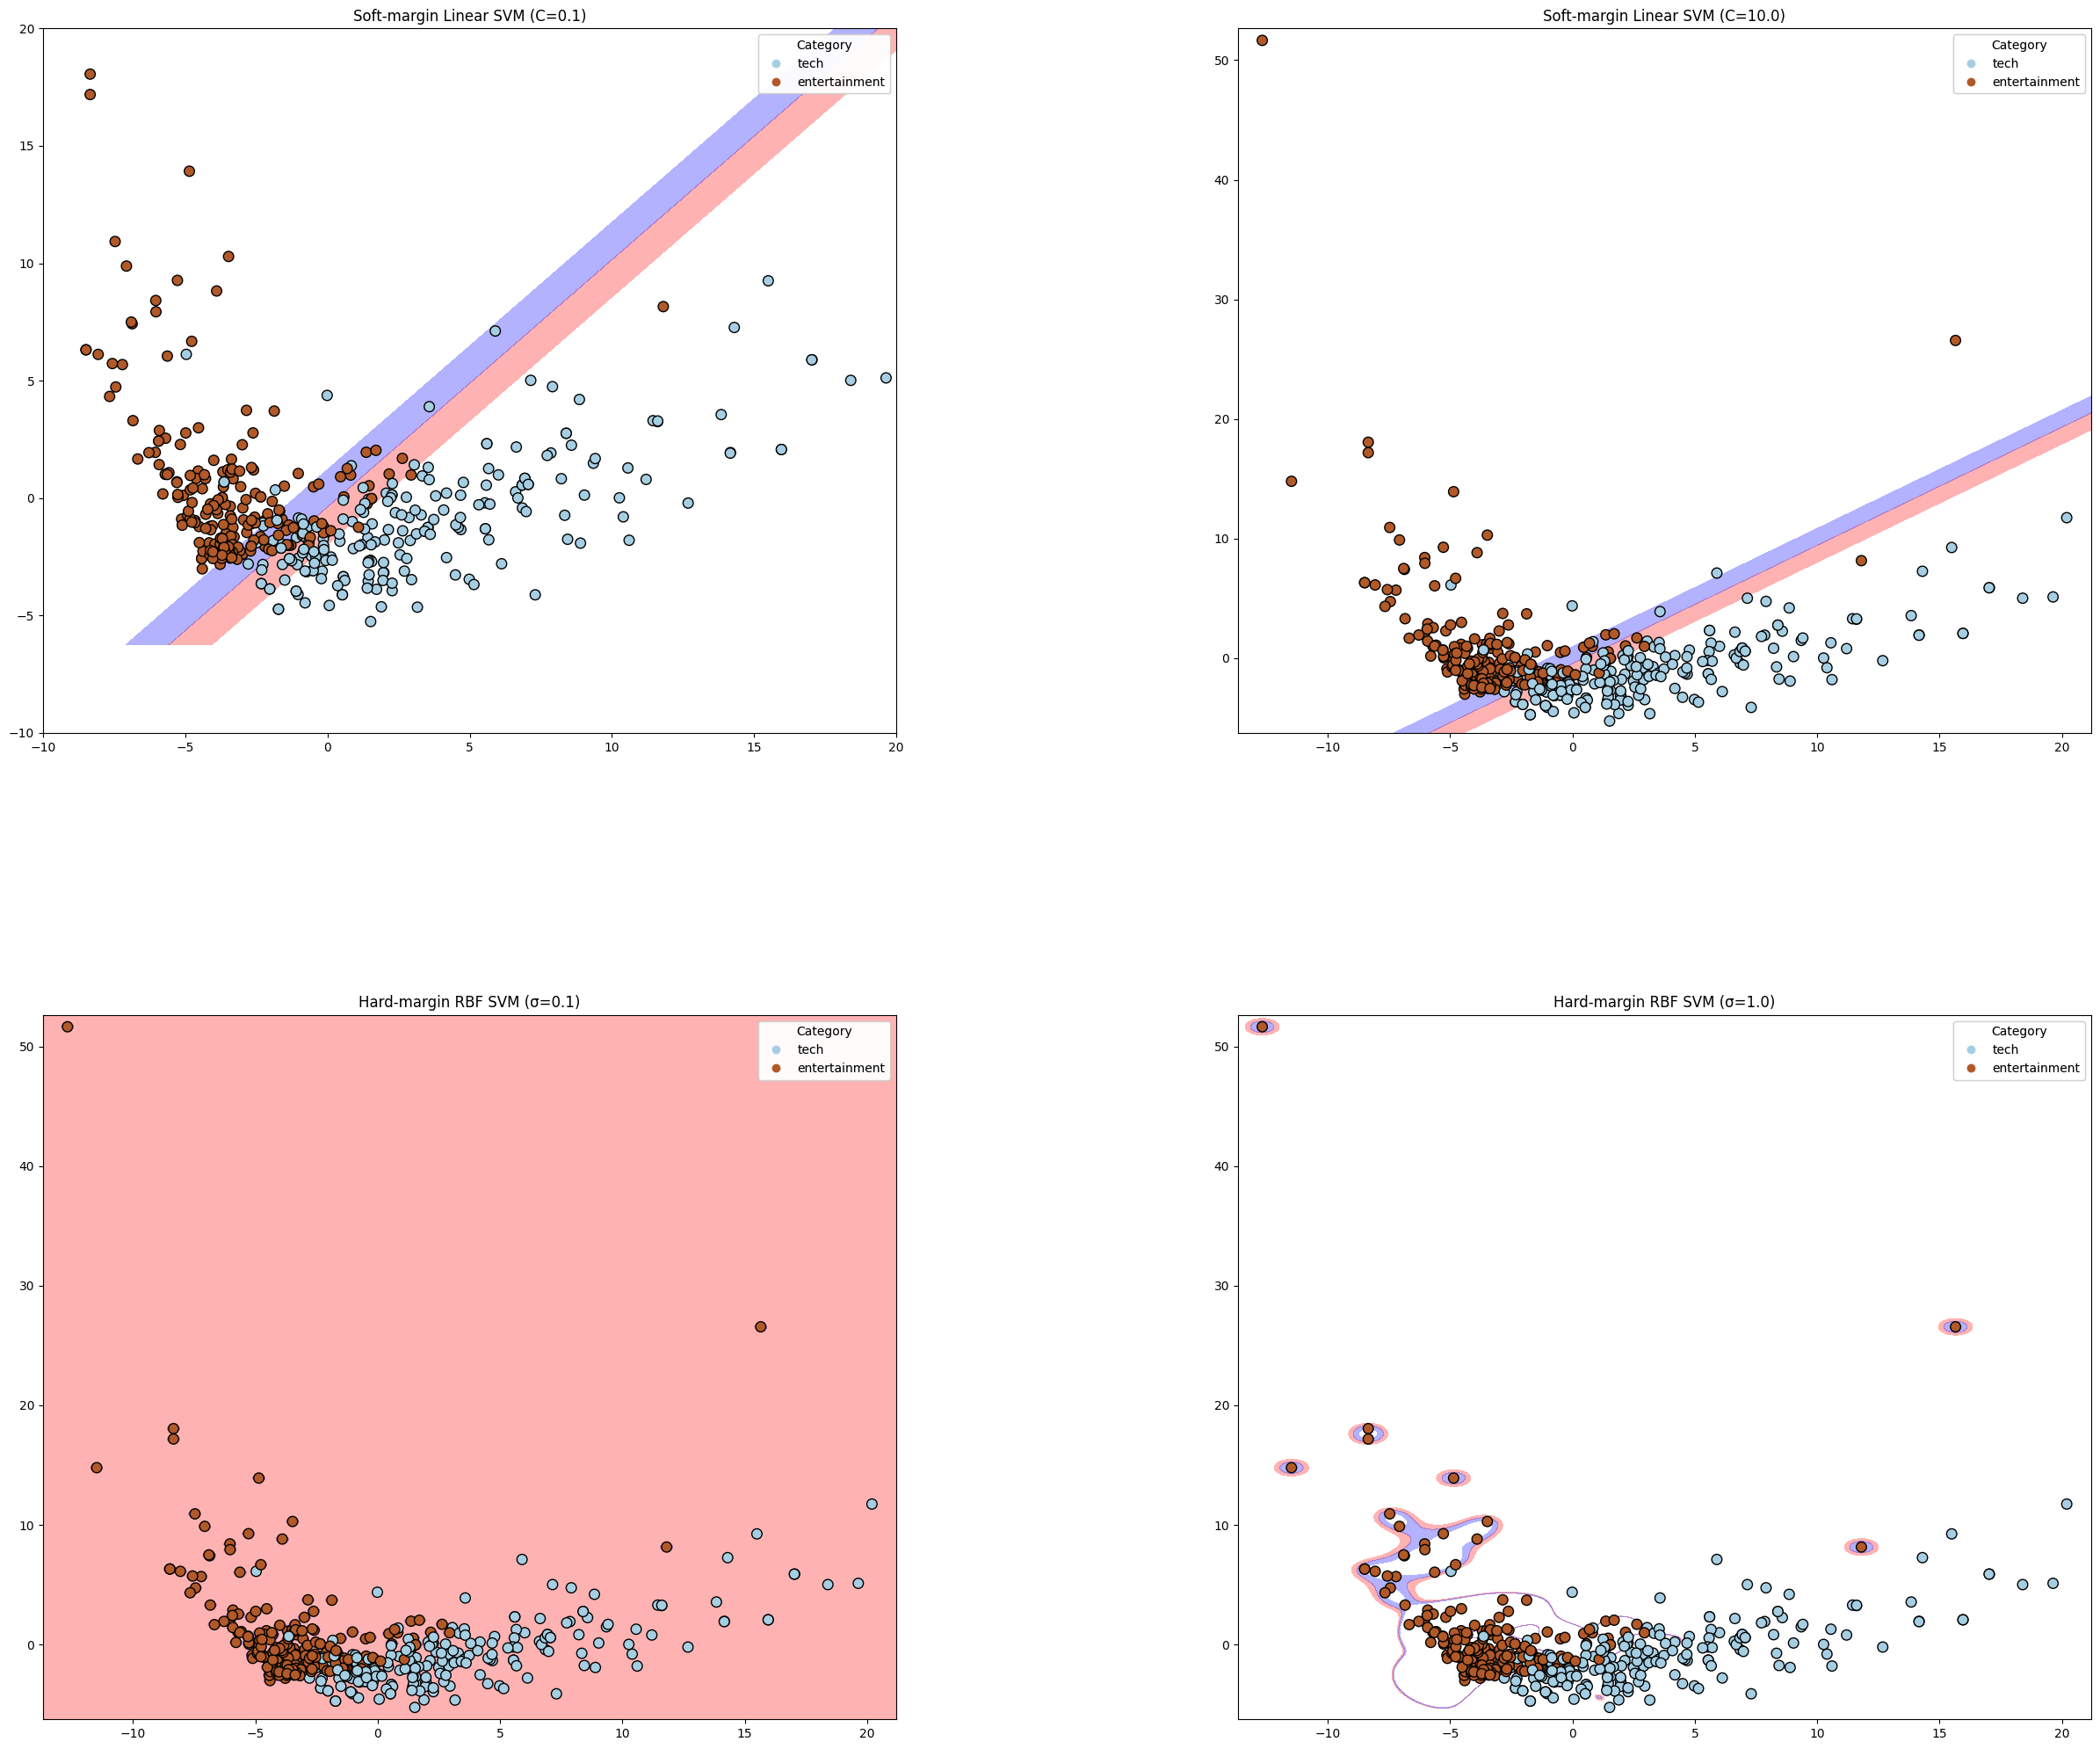

In [ ]:
df = pd.read_csv("train.csv",delimiter = ",")
X = df.drop('Category', axis=1)
y = df['Category']

y_train = [1 if label == 'entertainment' else 0 for label in y]

vectorizer = CountVectorizer()
count_X_svm = vectorizer.fit_transform(X['Text']).toarray()

# X_train, X_valid, y_train, y_valid = train_test_split(count_X_svm, y_svm, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(count_X_svm)

C = 0.1
linear_svm = svm.SVC(kernel='linear', C=C)
linear_svm.fit(X_train_2D, y_train)

C_larger = 10.0
linear_svm_larger = svm.SVC(kernel='linear', C=C_larger)
linear_svm_larger.fit(X_train_2D, y_train)

sigma = 0.1
gamma = 1 / (2 * sigma**2)
rbf_svm = svm.SVC(kernel='rbf', C=1e6, gamma=gamma)
rbf_svm.fit(X_train_2D, y_train)

sigma_larger = 1.0
gamma_larger = 1 / (2 * sigma_larger**2)
rbf_svm_larger = svm.SVC(kernel='rbf', C=1e6, gamma=gamma_larger)
rbf_svm_larger.fit(X_train_2D, y_train)

xx, yy = np.meshgrid(np.linspace(X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1, 500),
                     np.linspace(X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1, 500))

# Increase figure size
fig, axs = plt.subplots(2, 2, figsize=(24, 20))

# Soft-margin Linear SVM (C=0.1)
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0, 0].contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue', 'green'])
scatter = axs[0, 0].scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, s=70)
axs[0, 0].set_title('Soft-margin Linear SVM (C={})'.format(C))
legend1 = axs[0, 0].legend(*scatter.legend_elements(), title="Category")
axs[0, 0].add_artist(legend1)
legend1.get_texts()[0].set_text('tech')
legend1.get_texts()[1].set_text('entertainment')
# Set axis limits to focus on the main data cluster
axs[0, 0].set_xlim(-10, 20)
axs[0, 0].set_ylim(-10, 20)

# Soft-margin Linear SVM (C=10.0)
Z = linear_svm_larger.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0, 1].contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue', 'green'])
scatter = axs[0, 1].scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, s=70)
axs[0, 1].set_title('Soft-margin Linear SVM (C={})'.format(C_larger))
legend2 = axs[0, 1].legend(*scatter.legend_elements(), title="Category")
axs[0, 1].add_artist(legend2)
legend2.get_texts()[0].set_text('tech')
legend2.get_texts()[1].set_text('entertainment')
# Set axis limits to focus on the main data cluster
# Adjust these limits based on the main cluster range
axs[0, 0].set_xlim(-10, 20)
axs[0, 0].set_ylim(-10, 20)

# Hard-margin RBF SVM (σ=0.1)
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1, 0].contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue', 'green'])
scatter = axs[1, 0].scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, s=70)
axs[1, 0].set_title('Hard-margin RBF SVM (σ={})'.format(sigma))
legend3 = axs[1, 0].legend(*scatter.legend_elements(), title="Category")
axs[1, 0].add_artist(legend3)
legend3.get_texts()[0].set_text('tech')
legend3.get_texts()[1].set_text('entertainment')
# Set axis limits to focus on the main data cluster
# Adjust these limits based on the main cluster range
axs[0, 0].set_xlim(-10, 20)
axs[0, 0].set_ylim(-10, 20)

# Hard-margin RBF SVM (σ=1.0)
Z = rbf_svm_larger.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1, 1].contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue', 'green'])
scatter = axs[1, 1].scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, s=70)
axs[1, 1].set_title('Hard-margin RBF SVM (σ={})'.format(sigma_larger))
legend4 = axs[1, 1].legend(*scatter.legend_elements(), title="Category")
axs[1, 1].add_artist(legend4)
legend4.get_texts()[0].set_text('tech')
legend4.get_texts()[1].set_text('entertainment')
# Set axis limits to focus on the main data cluster
# Adjust these limits based on the main cluster range
axs[0, 0].set_xlim(-10, 20)
axs[0, 0].set_ylim(-10, 20)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

(d) NN

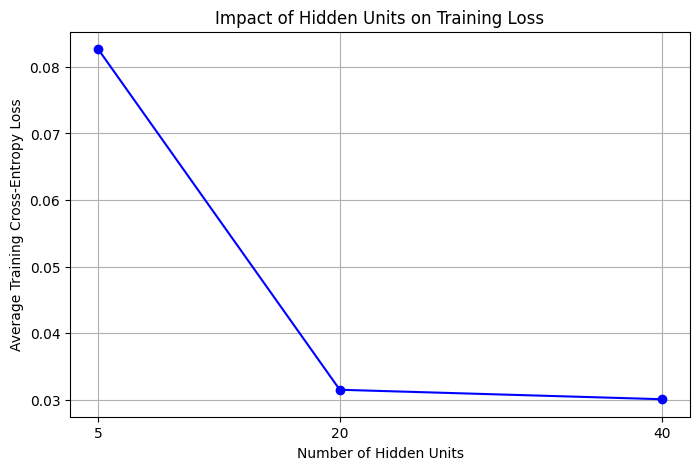

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the dataset
df = pd.read_csv("train.csv")

# Process text data
vectorizer = CountVectorizer() # This object converts the text data into a matrix of token counts. It tokenizes the text along with applying several other preprocessing steps like converting to lowercase and removing punctuation.
X = vectorizer.fit_transform(df['Text']).toarray() # 'fit_transform': This function learns the vocabulary dictionary and returns a document-term matrix. toarray() converts this matrix from a scipy sparse matrix to a numpy array.

# Encode category labels
label_encoder = LabelEncoder() # LabelEncoder: Transforms categorical labels into integers.
y = label_encoder.fit_transform(df['Category']) # fit_transform learns and transforms the labels to normalized encoding.

# Define different numbers of hidden units to test
hidden_units = [5, 20, 40] # defines a list of hidden unit configurations to test.
average_losses = {}

# Training models with different configurations
for units in hidden_units:
    clf = MLPClassifier(hidden_layer_sizes=(units,), max_iter=100, learning_rate_init=0.01, # hidden_layer_sizes=(units,): Specifies the number of neurons in the hidden layers. Here, it's a tuple with one value as there's only one hidden layer.
                        solver='adam', random_state=42, activation='logistic') # max_iter=100: Maximum number of epochs to run. An epoch is an iteration over the entire data provided.
                                                                           # learning_rate_init=0.01: The initial learning rate used. It controls the step-size in updating the weights.
                                                                           # solver='adam': The solver for weight optimization. 'Adam' refers to a stochastic gradient-based optimizer.
                                                                           # activation='logistic': Activation function for the hidden layer.
    clf.fit(X, y) # Fits the model to the data matrix X and target y.
                  # This is where the MLP is being trained. During this training, the MLP will use the Cross-Entropy Loss to update the weights.
                  # The Cross-Entropy Loss is calculated after each forward pass, and its gradient is used in the backward pass to update the weights via the 'adam' optimizer.

    # Records the loss at the end of each epoch. The average loss for each configuration is computed and stored.
    average_losses[units] = sum(clf.loss_curve_) / len(clf.loss_curve_)


# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(list(average_losses.keys()), list(average_losses.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Average Training Cross-Entropy Loss')
plt.title('Impact of Hidden Units on Training Loss')
plt.grid(True)
plt.xticks(list(average_losses.keys()))  # Ensure the x-ticks correspond to the number of hidden units
plt.show()

## __Task 3: Classification Quality Evaluation__

In [ ]:
# read test data
X_test = pd.read_csv("test.csv")['Text']
y_test = pd.read_csv("test.csv")['Category']
m = [0.1,0.3,0.5,0.7,0.9]

### (a) F1 score

### (i) NB


[0.9597855227882037, 0.9752650176678445, 0.9853658536585367, 0.9919999999999999, 1.0]
[0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9917355371900827]


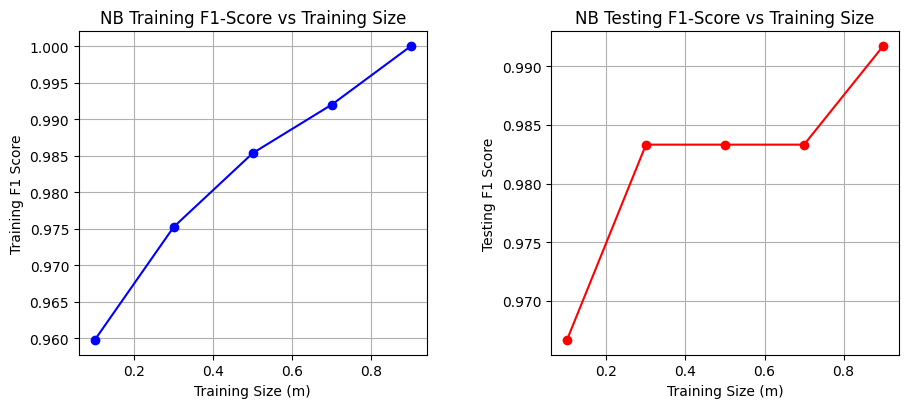

In [ ]:
# initialize the f1 scores list
training_f1_NB = []
testing_f1_NB = []

# Fit CountVectorizer on the training data and transform both training and validation data

df = pd.read_csv("train.csv",delimiter = ",")
X = df.drop('Category', axis=1)
y = df['Category']

for training_size in m:
    # split training set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=training_size,random_state=29)

    # vectorized X_train,X_valid,X_test
    count_vectorizer = CountVectorizer()
    count_X_train = count_vectorizer.fit_transform(X_train['Text'])
    count_X_valid = count_vectorizer.transform(X_valid['Text'])
    count_X_test = count_vectorizer.transform(X_test)

    # Initialize and train the classifier
    clf = MultinomialNB()
    clf.fit(count_X_train, y_train)

    # using validation set to predict and calculate training accuracy(F1-score)
    y_pred_valid = clf.predict(count_X_valid)
    training_f1_score = metrics.f1_score(y_valid, y_pred_valid,pos_label='entertainment')
    training_f1_NB.append(training_f1_score)

    # using test set to predcit and calculate testing accuracy(F1-score)
    y_pred_test = clf.predict(count_X_test)
    testing_f1_score = metrics.f1_score(y_test, y_pred_test,pos_label='entertainment')
    testing_f1_NB.append(testing_f1_score)

print(training_f1_NB)
print(testing_f1_NB)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(m, training_f1_NB, marker='o', linestyle='-', color='b')
plt.title('NB Training F1-Score vs Training Size')
plt.xlabel('Training Size (m)')
plt.ylabel('Training F1 Score')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(m, testing_f1_NB, marker='o', linestyle='-', color='r')
plt.title('NB Testing F1-Score vs Training Size')
plt.xlabel('Training Size (m)')
plt.ylabel('Testing F1 Score')
plt.grid(True)
plt.tight_layout(pad=4.0)
plt.show()


### (ii) kNN

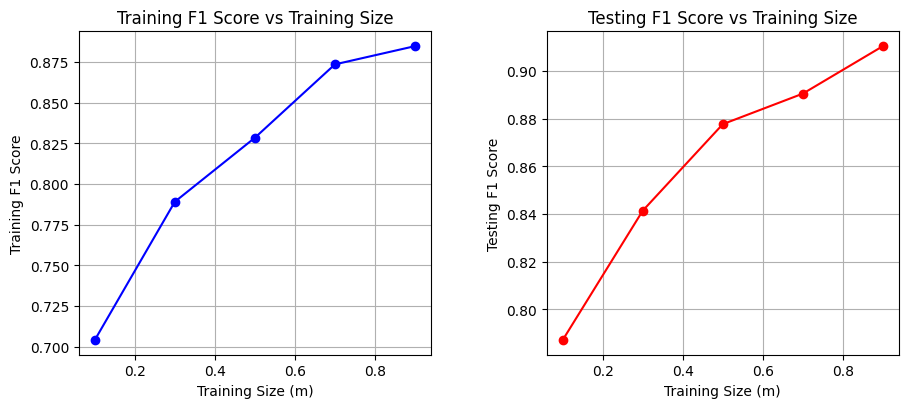

In [ ]:
training_f1_knn = []
testing_f1_knn = []

for training_size in m:
    # split training set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=training_size, random_state=32)

    # vectorized X_train,X_valid,X_test
    count_vectorizer = CountVectorizer()
    count_X_train = count_vectorizer.fit_transform(X_train['Text'])
    count_X_valid = count_vectorizer.transform(X_valid['Text'])
    count_X_test = count_vectorizer.transform(X_test)


    # Initialize and train the classifier
    clf = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
    clf.fit(count_X_train, y_train)

    # using validation set to predict and calculate training accuracy(F1-score)
    y_pred_valid = clf.predict(count_X_valid)
    training_f1_score = metrics.f1_score(y_valid, y_pred_valid, pos_label='entertainment')
    training_f1_knn.append(training_f1_score)

    # using test set to predcit and calculate testing accuracy(F1-score)
    y_pred_test = clf.predict(count_X_test)
    testing_f1_score = metrics.f1_score(y_test, y_pred_test, pos_label='entertainment')
    testing_f1_knn.append(testing_f1_score)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(m, training_f1_knn, marker='o', linestyle='-', color='b')
plt.title('Training F1 Score vs Training Size')
plt.xlabel('Training Size (m)')
plt.ylabel('Training F1 Score')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(m, testing_f1_knn, marker='o', linestyle='-', color='r')
plt.title('Testing F1 Score vs Training Size')
plt.xlabel('Training Size (m)')
plt.ylabel('Testing F1 Score')
plt.grid(True)
plt.tight_layout(pad=4.0)
plt.show()

### (iii) Soft margin SVM and Hard-margin RBF kernel SVM


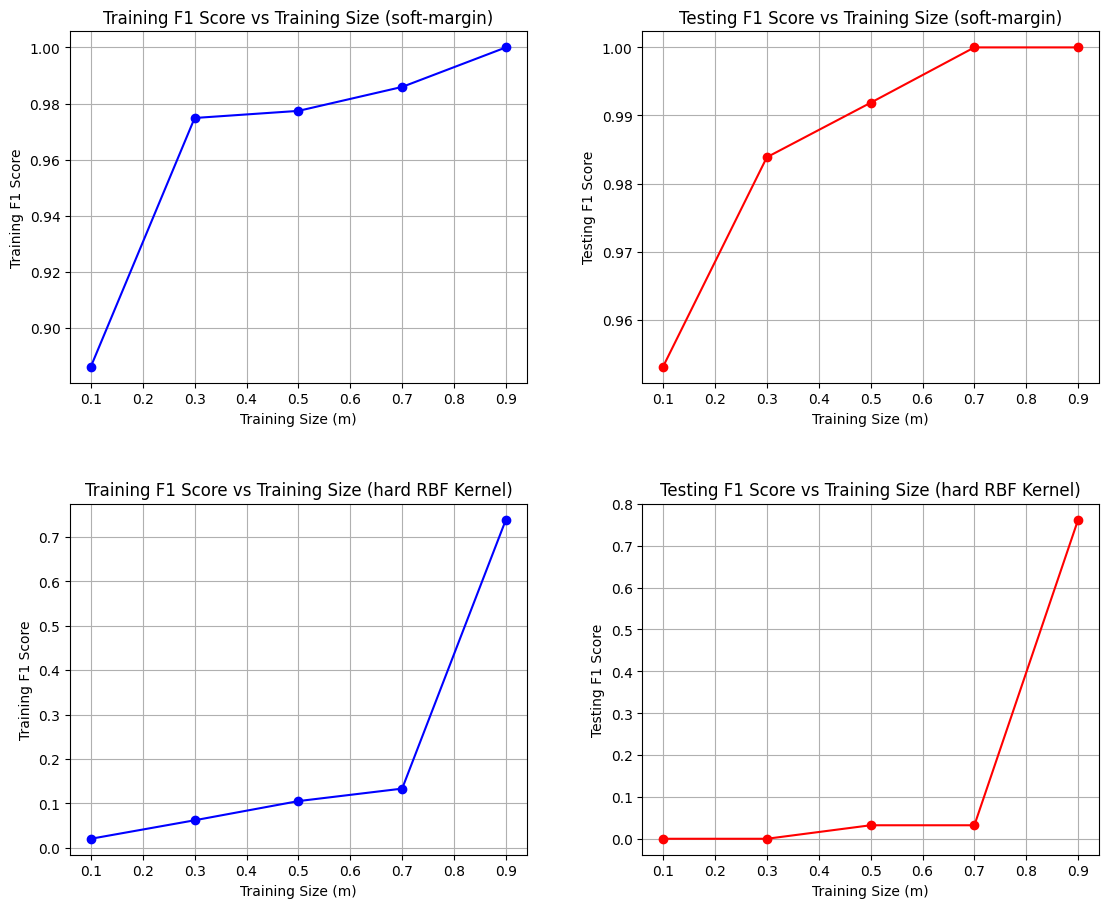

In [ ]:
training_f1_svm_soft = []
testing_f1_svm_soft = []

training_f1_svm_kernel = []
testing_f1_svm_kernel = []

for training_size in m:
    # split training set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=training_size, random_state=72)

    # vectorized X_train,X_valid,X_test
    count_vectorizer = CountVectorizer()
    count_X_train = count_vectorizer.fit_transform(X_train['Text'])
    count_X_valid = count_vectorizer.transform(X_valid['Text'])
    count_X_test = count_vectorizer.transform(X_test)

    # train soft margin svm and get the f1-score for both validation set and testing set
    C = 0.1
    linear_svm = svm.SVC(kernel='linear', C=C)
    linear_svm.fit(count_X_train, y_train)

    y_pred_valid = linear_svm.predict(count_X_valid)
    training_f1_score_val = metrics.f1_score(y_valid, y_pred_valid, pos_label='entertainment')
    training_f1_svm_soft.append(training_f1_score_val)

    y_pred_test = linear_svm.predict(count_X_test)
    testing_f1_score_val = metrics.f1_score(y_test, y_pred_test, pos_label='entertainment')
    testing_f1_svm_soft.append(testing_f1_score_val)
    # train hard-margin RBF kernel and get the f1-score for both validation set and testing set
    sigma_larger = 1.0
    gamma_larger = 1 / (2 * sigma_larger**2)
    rbf_svm_larger = svm.SVC(kernel='rbf', C=1e6, gamma=gamma_larger)
    rbf_svm_larger.fit(count_X_train, y_train)

    y_pred_valid = rbf_svm_larger.predict(count_X_valid)
    training_f1_score = metrics.f1_score(y_valid, y_pred_valid, pos_label='entertainment')
    training_f1_svm_kernel.append(training_f1_score)

    y_pred_test = rbf_svm_larger.predict(count_X_test)
    testing_f1_score = metrics.f1_score(y_test, y_pred_test, pos_label='entertainment')
    testing_f1_svm_kernel.append(testing_f1_score)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting
axs[0, 0].plot(m, training_f1_svm_soft, marker='o', linestyle='-', color='b')
axs[0, 0].set_title('Training F1 Score vs Training Size (soft-margin)')
axs[0, 0].set_xlabel('Training Size (m)')
axs[0, 0].set_ylabel('Training F1 Score')
axs[0, 0].grid(True)


axs[0, 1].plot(m, testing_f1_svm_soft, marker='o', linestyle='-', color='r')
axs[0, 1].set_title('Testing F1 Score vs Training Size (soft-margin)')
axs[0, 1].set_xlabel('Training Size (m)')
axs[0, 1].set_ylabel('Testing F1 Score')
axs[0, 1].grid(True)


axs[1, 0].plot(m, training_f1_svm_kernel, marker='o', linestyle='-', color='b')
axs[1, 0].set_title('Training F1 Score vs Training Size (hard RBF Kernel)')
axs[1, 0].set_xlabel('Training Size (m)')
axs[1, 0].set_ylabel('Training F1 Score')
axs[1, 0].grid(True)


axs[1, 1].plot(m, testing_f1_svm_kernel, marker='o', linestyle='-', color='r')
axs[1, 1].set_title('Testing F1 Score vs Training Size (hard RBF Kernel)')
axs[1, 1].set_xlabel('Training Size (m)')
axs[1, 1].set_ylabel('Testing F1 Score')
axs[1, 1].grid(True)

plt.tight_layout(pad=4.0)
plt.show()


###(v) Neural Network

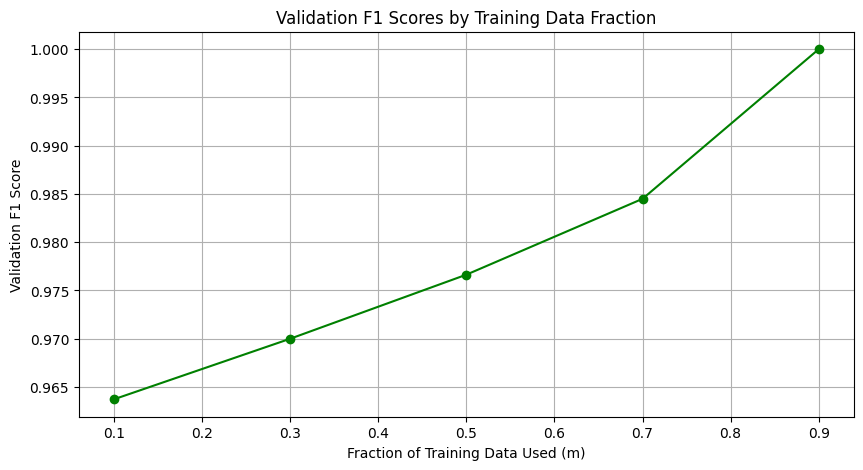

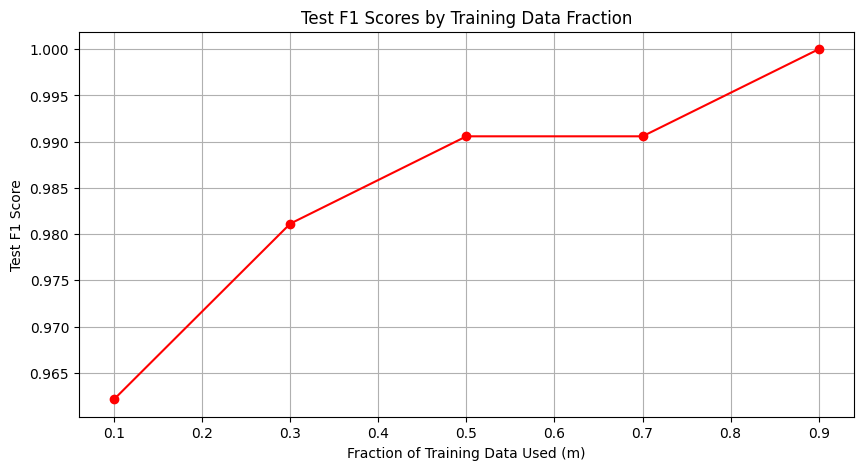

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Process text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_df['Text']).toarray()
y = LabelEncoder().fit_transform(train_df['Category'])

# Process the test data in the same way as the training data
X_test = vectorizer.transform(test_df['Text']).toarray()
y_test = LabelEncoder().fit_transform(test_df['Category'])

# List of m values
m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
valid_f1_scores = []  # This will store the validation F1 scores
test_f1_scores = []   # This will store the test F1 scores

# Train and evaluate the classifier for each fraction m
for m in m_values:
    # Split the data into training and validation subsets based on the current m value
    X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X, y, train_size=m, random_state=99)

    # Initialize and train the MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=100, learning_rate_init=0.01,
                        solver='adam', random_state=42, activation='logistic')
    clf.fit(X_train_sub, y_train_sub)

    # Predict on the validation set
    y_valid_pred = clf.predict(X_valid)
    # Predict on the test set
    y_test_pred = clf.predict(X_test)

    # Calculate F1 score for the validation set
    valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')
    valid_f1_scores.append(valid_f1)

    # Calculate F1 score for the test set
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_f1_scores.append(test_f1)

# Plot for validation F1 score
plt.figure(figsize=(10, 5))
plt.plot(m_values, valid_f1_scores, marker='o', linestyle='-', color='green')
plt.title('Validation F1 Scores by Training Data Fraction')
plt.xlabel('Fraction of Training Data Used (m)')
plt.ylabel('Validation F1 Score')
plt.grid(True)
plt.show()

# Plot for test F1 score
plt.figure(figsize=(10, 5))
plt.plot(m_values, test_f1_scores, marker='o', linestyle='-', color='red')
plt.title('Test F1 Scores by Training Data Fraction')
plt.xlabel('Fraction of Training Data Used (m)')
plt.ylabel('Test F1 Score')
plt.grid(True)
plt.show()

### (b) 5-Fold cross-validation

In [16]:
# read test data
X_test = pd.read_csv("test.csv")['Text']
y_test = pd.read_csv("test.csv")['Category']
m = [0.1,0.3,0.5,0.7,0.9]

### (i) NB

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Fit CountVectorizer on the training data and transform both training and validation data

df = pd.read_csv("train.csv", delimiter = ",")
X = df.drop('Category', axis=1)
y = df['Category']

# Vectorize the text data
count_vectorizer = CountVectorizer()
count_X_cross = count_vectorizer.fit_transform(X['Text'])
count_X_test = count_vectorizer.transform(X_test)

# Train NB with hyperparameter alpha=1 (Laplace smoothing) using 5-fold cross-validation
clf = MultinomialNB(alpha=1, force_alpha=True)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, count_X_cross, y, cv=k_fold, scoring='f1_weighted')
mean_cv_scores = np.mean(cv_scores)

# Print out the result of validation accuracy using Laplace smoothing
print("Validation F1-score for each fold (smoothing): ", cv_scores)
print(f"Mean Validation F1-score (smoothing）: {mean_cv_scores:.4f}.")
print()

# Train NB with a very small alpha (approximating no smoothing) using 5-fold cross-validation
clf_no_smooth = MultinomialNB(alpha=1E-10, force_alpha=True)
cv_scores = cross_val_score(clf_no_smooth, count_X_cross, y, cv=k_fold, scoring='f1_weighted')
mean_cv_scores = np.mean(cv_scores)

# Print out the result of validation accuracy with no smoothing
print("Validation F1-score for each fold (no smoothing): ", cv_scores)
print(f"Mean Validation F1-score (no smoothing）: {mean_cv_scores:.4f}.")

# Train NB classifier with the whole training data set with smoothing
clf.fit(count_X_cross, y)
y_pred = clf.predict(count_X_test)
testing_accuracy_score = metrics.f1_score(y_test, y_pred,pos_label='entertainment')

#Print out the test accuracy in F1 measure
print()
print(f"Testing F1-score (smoothing) : {testing_accuracy_score:.4f}")

# Train NB classifier with the whole training data set without smoothing
clf_no_smooth.fit(count_X_cross, y)
y_pred_no_sm = clf_no_smooth.predict(count_X_test)
testing_accuracy_score = metrics.f1_score(y_test, y_pred_no_sm,pos_label='entertainment')
print(f"Testing F1-score (no smoothing) : {testing_accuracy_score:.4f}.")

Validation F1-score for each fold (smoothing):  [0.9883864  0.97675677 0.98837367 0.97647059 0.98823529]
Mean Validation F1-score (smoothing）: 0.9836.

Validation F1-score for each fold (no smoothing):  [0.9883864  0.94182116 0.965121   0.94109501 0.97646407]
Mean Validation F1-score (no smoothing）: 0.9626.

Testing F1-score (smoothing) : 0.9748
Testing F1-score (no smoothing) : 0.9917.


### (ii) kNN

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset and split into features (X) and labels (y)

# Initialize a dictionary to store accuracy scores for each value of k
accuracy_scores = {}

# Define range of k values to compare the different impact of 10 different value of k
k_values = range(1, 11)

# Perform 5-fold cross-validation for each value of k
for k in k_values:
    #Fit knn classifer using Euclidean Distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    kf = KFold(n_splits=5)
    #Using F1-score to evaluate the validation set
    cv_results = cross_validate(knn, count_X, y, cv=kf, return_train_score=False, scoring='f1_weighted')
    accuracy_scores[k] = cv_results['test_score']

best_k = None
best_accuracy = 0
mean_accuracy_list = []
# Print all accuracy scores
for k, scores in accuracy_scores.items():
    formatted_scores = ', '.join([f"{score:.4f}" for score in scores])
    print(f"Validation F1-score for k={k}: {formatted_scores}")
    mean_acc = np.mean(scores)
    print(f"Mean Validation F1-score for k={k}: {mean_acc:.2f}")
    #choose the best k and the highest accuracy
    mean_accuracy_list.append(mean_acc)
    if mean_acc > best_accuracy:
        best_accuracy = mean_acc
        best_k = k

print(f"\nThe best k is {best_k}.")

# Plotting accuracy for different k values to select the best one
plt.figure(figsize=(7, 4))
plt.title('Validation F1-score for different values of k Using Euclidean Distance')
plt.plot(k_values, mean_accuracy_list, marker='o')
plt.grid(True)
plt.xlabel('Value of k')
plt.ylabel('Validation F1-score')




In [ ]:
#Use the best k (k = 1) as the hyperparameter and Euclidean Distance as distance metric
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Train the classifier
knn.fit(count_X, y)

# Read test data
X_test = pd.read_csv("test.csv")['Text']
y_test = pd.read_csv("test.csv")['Category']

# Predict on the test set
count_X_test = count_vectorizer.transform(X_test)
y_pred = knn.predict(count_X_test)

# Use F1-score to evaluate the prediction on the test set
test_accuracy = metrics.f1_score(y_test, y_pred, pos_label='entertainment')

# Print the result of the test data accuracy on F1 Score
print(f"When k = 1, the test f1_score is: {test_accuracy:.2f}.")

### (iii) Soft margin SVM and Hard-margin RBF kernel SVM

In [ ]:
count_vectorizer = CountVectorizer()
count_X_cross = count_vectorizer.fit_transform(X['Text'])
count_X_test = count_vectorizer.transform(X_test)

# evaluate C by cross validation. initialize a list of C to be evaluated
c_range = [0.001,0.01,0.1,1]
validation_f1 = []

# find the best C. Initialized to be 0 and None
best_acc = 0
best_c = None
print(f'Soft-margin SVM:')
# loop all C, in each iteration evaluated (5-fold cross validation) f1 score under one C, and find the best C
for c in c_range:
  linear_svm1 = svm.SVC(kernel='linear', C=c)
  k_fold = KFold(n_splits=5, shuffle=True, random_state=222)
  cv_scores = cross_val_score(linear_svm1, count_X_cross, y, cv=k_fold, scoring='f1_weighted')
  #print(cv_scores)
  mean_validation_f1 =np.mean(cv_scores)
  validation_f1.append(mean_validation_f1)
  print(f'The validation f1-score of C={c}: {mean_validation_f1:.2f}')
  if mean_validation_f1 > best_acc:
    best_acc = mean_validation_f1
    best_c = c
print(f'The best C is {best_c}')


# using the best C, calculate the f1-score of testing data.
linear_svm = svm.SVC(kernel='linear', C=best_c)
linear_svm.fit(count_X_cross, y)
y_pred = linear_svm.predict(count_X_test)
training_f1_score_val = metrics.f1_score(y_test, y_pred, pos_label='entertainment')
print(f'When C = {best_c}, the test f1_score is: {training_f1_score_val:.2f}.')


In [ ]:
# hard-margin RBF kernel
# evaluate sigma by cross validation. initialize a list of sigma to be evaluated
sigma_range = [0.1,1,10,100,10000]
validation_f1_rbf = []
best_f1 = 0
best_sigma = None
print(f'hard-margin RBF kernel: ')
# loop all sigma, in each iteration evaluated (5-fold cross validation) f1 score under one sigma, and find the best sigma
for sigma in sigma_range:
  gamma = 1 / (2 * sigma**2)
  rbf_svm = svm.SVC(kernel='rbf', C=1e6, gamma=gamma)
  k_fold = KFold(n_splits=5, shuffle=True, random_state=222)
  cv_scores = cross_val_score(rbf_svm, count_X_cross, y, cv=k_fold, scoring='f1_weighted')
  #print(f'sigma {sigma}: {cv_scores}')
  mean_validation_f1 =np.mean(cv_scores)
  validation_f1_rbf.append(mean_validation_f1)
  print(f'The validation f1-score of sigma={sigma}: {mean_validation_f1:.2f}')
  if mean_validation_f1 > best_f1:
    best_f1 = mean_validation_f1
    best_sigma = sigma
print(f'The best sigma is {best_sigma}')

# using the best sigma, calculate the f1-score of testing data.
rbf_svm.fit(count_X_cross, y)
y_pred = rbf_svm.predict(count_X_test)
training_f1_score_val = metrics.f1_score(y_test, y_pred, pos_label='entertainment')
print(f'When sigma = {best_sigma}, the test f1_score is: {training_f1_score_val:.2f}.')

### (v) Neural Network
### Hidden unit is chosen as the key hyperparameter to evaluate.

In [ ]:
# Load the dataset
df = pd.read_csv("train.csv")

# Process text data
vectorizer = CountVectorizer() # This object converts the text data into a matrix of token counts. It tokenizes the text along with applying several other preprocessing steps like converting to lowercase and removing punctuation.
X = vectorizer.fit_transform(df['Text']).toarray() # 'fit_transform': This function learns the vocabulary dictionary and returns a document-term matrix. toarray() converts this matrix from a scipy sparse matrix to a numpy array.

# Encode category labels
label_encoder = LabelEncoder() # LabelEncoder: Transforms categorical labels into integers.
y = label_encoder.fit_transform(df['Category']) # fit_transform learns and transforms the labels to normalized encoding.

# Initialize a dictionary to store accuracy scores for each value of hidden_units
f1_scores = {}

# Define different numbers of hidden_units to test
hidden_units = [5, 10, 20, 40, 60] # defines a list of hidden unit configurations to test.

# Initial best hyperparameter and accuracy to record the best one
best_hidden_unit = 0
best_f1 = 0

# Training models with different configurations
for units in hidden_units:
    clf = MLPClassifier(hidden_layer_sizes=(units,), max_iter=100, learning_rate_init=0.01,
                        solver='adam', random_state=42, activation='logistic')
    clf.fit(X, y) # Fits the model to the data matrix X and target y.
    # Perform 5-fold cross-validation for each value of units
    kf = KFold(n_splits=5)
    # Calculate F1_score respectively
    cv_results = (cross_validate(clf, count_X, y, cv=kf, return_train_score=False, scoring='f1_weighted'))['test_score']
    print(f"F1 Scores for {units} hidden unit is: {cv_results}.")
    # Calculate mean accuracy_scores for different hidden_units
    mean_f1_scores = np.mean(cv_results)
    f1_scores[units] = mean_f1_scores
    print(f"Mean F1 Scores for {units} hidden unit is: {mean_f1_scores:.4f}.\n")
    # Find the best value of hidden_unit
    if best_f1 < mean_f1_scores:
        best_hidden_unit = units
        best_f1 = mean_f1_scores

print(f"\nThe best hidden unit is {best_hidden_unit}.\n")

# Plotting the results of F1_score for different value of hidden units
plt.figure(figsize=(8, 5))
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), marker='o', linestyle='-', color='r')
plt.xlabel('Number of Hidden Units')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score for different values of hidden unit')
plt.grid(True)
plt.xticks(list(f1_scores.keys()))  # Ensure the x-ticks correspond to the number of hidden units
plt.show()

In [ ]:
# Use the best value of hidden_unit to evaluate the test set

# Fit a NN model using hidden_unit = 40
nn = MLPClassifier(hidden_layer_sizes=(40,), max_iter=100, learning_rate_init=0.01,
                        solver='adam', random_state=42, activation='logistic')

# Train the NN classifier
nn = nn.fit(X,y)

# Read test data
X_test = pd.read_csv("test.csv")['Text']

# Encode category labels for test set
y_test = label_encoder.fit_transform(pd.read_csv("test.csv")['Category'])

# Predict on the test set
count_X_test = count_vectorizer.transform(X_test)
y_pred = nn.predict(count_X_test)

# Use F1-score to evaluate the prediction on the test set
test_accuracy = metrics.f1_score(y_test, y_pred, average = 'weighted')

#Print the result of the test data accuracy
print(f"When hidden unit is 40, the test F1 Score is: {test_accuracy:.4f}")

### (c) NB, kNN, SVM and NN classifiers